In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
stita_df = pd.read_excel("dataset/stita.xlsx")
stita_df = stita_df.drop(columns=['id', 'dataset', 'question_id', 'question', 'correct'])
stita_df.head()

,real_answer,answer,score
0,When we talk about characters we refer to all ...,When we talk about characters we refer to all ...,1.000000
1,When we talk about characters we refer to all ...,Characters can be qualitative or quantitative....,0.590909
2,When we talk about characters we refer to all ...,The characters in the statistical units may be...,0.704545
3,When we talk about characters we refer to all ...,The types of characters are distinguished in q...,0.704545
4,When we talk about characters we refer to all ...,the types of characters are. Qualitative and q...,0.590909


In [3]:
stita_df['score'] = (stita_df['score']*100).round(0)

stita_df['prompt'] = (
    "Reference Answer: " + stita_df['real_answer'] + "\n"
    "Student Answer: " + stita_df['answer'] + "\n"
    "Grading Rubric: 0-100 (where 0 is the lowest score and 100 is the highest).\n"
    "Scores given by experts: " + stita_df['score'].astype(str)
)

stita_df['prompt_length'] = stita_df['prompt'].apply(len)
stita_df.head()


,real_answer,answer,score,prompt,prompt_length
0,When we talk about characters we refer to all ...,When we talk about characters we refer to all ...,100.0,Reference Answer: When we talk about character...,3216
1,When we talk about characters we refer to all ...,Characters can be qualitative or quantitative....,59.0,Reference Answer: When we talk about character...,2389
2,When we talk about characters we refer to all ...,The characters in the statistical units may be...,70.0,Reference Answer: When we talk about character...,2490
3,When we talk about characters we refer to all ...,The types of characters are distinguished in q...,70.0,Reference Answer: When we talk about character...,2481
4,When we talk about characters we refer to all ...,the types of characters are. Qualitative and q...,59.0,Reference Answer: When we talk about character...,2373


In [4]:
stita_df['prompt_length'].describe()

count     333.000000
mean     3098.180180
std       894.102952
min      1522.000000
25%      2490.000000
50%      2887.000000
75%      3589.000000
max      5905.000000
Name: prompt_length, dtype: float64

In [5]:
stita_df.shape

(333, 5)

## Score distribution plot

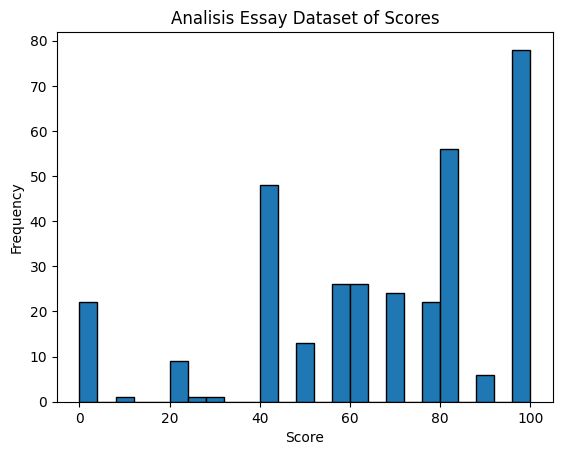

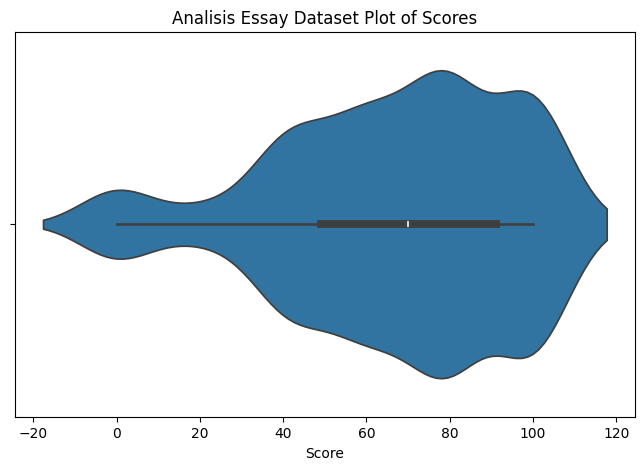

In [6]:
plt.hist(stita_df['score'], bins=25, edgecolor='black')
plt.title('Analisis Essay Dataset of Scores')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.show()
plt.figure(figsize=(8, 5))
sns.violinplot(x=stita_df['score'])
plt.title('Analisis Essay Dataset Plot of Scores')
plt.xlabel('Score')
plt.show()


## Input Length Plot

In [7]:
stita_df['r_length'] = stita_df['real_answer'].apply(len)
stita_df['a_length'] = stita_df['answer'].apply(len)

In [8]:
print("\ndeskripsi reference answer")
print(stita_df['r_length'].describe())
print("\ndeskripsi student answer")
print(stita_df['a_length'].describe())


deskripsi reference answer
count     333.000000
mean     1937.765766
std       512.221137
min      1381.000000
25%      1537.000000
50%      1645.000000
75%      2347.000000
max      2872.000000
Name: r_length, dtype: float64

deskripsi student answer
count     333.000000
mean     1019.249249
std       637.705829
min         1.000000
25%       569.000000
50%       873.000000
75%      1481.000000
max      2891.000000
Name: a_length, dtype: float64


### Reference answer plot

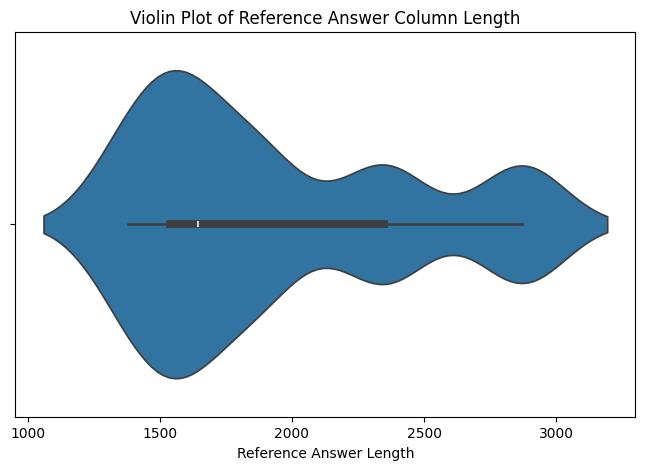

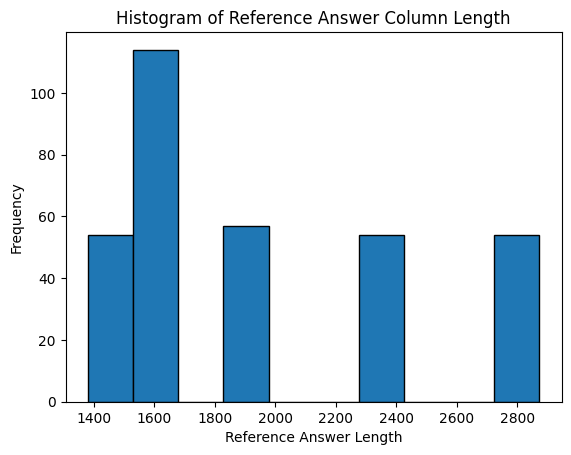

In [9]:
plt.figure(figsize=(8, 5))
sns.violinplot(x=stita_df['r_length'])
plt.title('Violin Plot of Reference Answer Column Length')
plt.xlabel('Reference Answer Length')
plt.show()
plt.hist(stita_df['r_length'], bins=10, edgecolor='black')
plt.title('Histogram of Reference Answer Column Length')
plt.xlabel('Reference Answer Length')
plt.ylabel('Frequency')
plt.show()

### Student answer plot

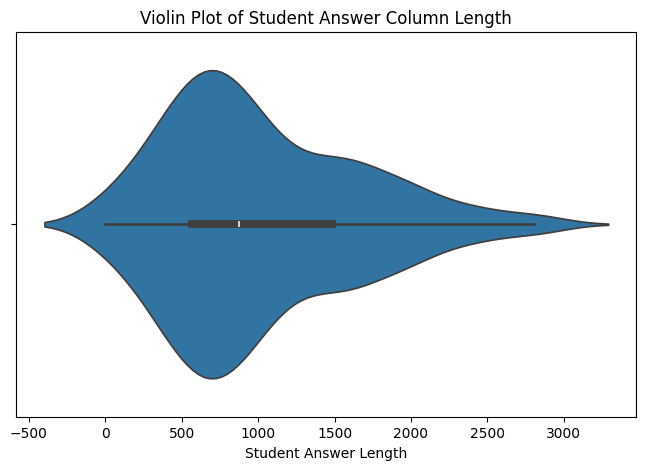

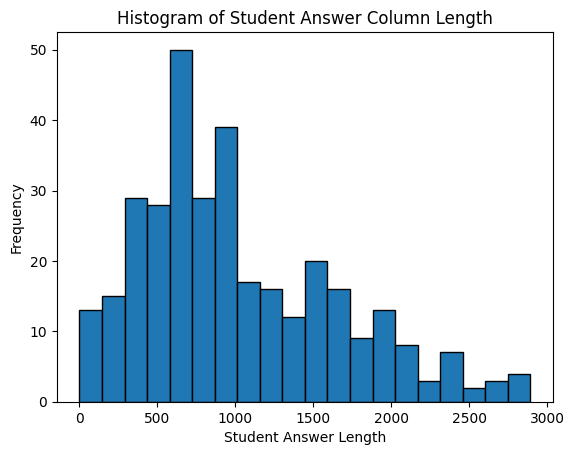

In [10]:
plt.figure(figsize=(8, 5))
sns.violinplot(x=stita_df['a_length'])
plt.title('Violin Plot of Student Answer Column Length')
plt.xlabel('Student Answer Length')
plt.show()
plt.hist(stita_df['a_length'], bins=20, edgecolor='black')
plt.title('Histogram of Student Answer Column Length')
plt.xlabel('Student Answer Length')
plt.ylabel('Frequency')
plt.show()

In [11]:
stita_df.head()

,real_answer,answer,score,prompt,prompt_length,r_length,a_length
0,When we talk about characters we refer to all ...,When we talk about characters we refer to all ...,100.0,Reference Answer: When we talk about character...,3216,1537,1537
1,When we talk about characters we refer to all ...,Characters can be qualitative or quantitative....,59.0,Reference Answer: When we talk about character...,2389,1537,711
2,When we talk about characters we refer to all ...,The characters in the statistical units may be...,70.0,Reference Answer: When we talk about character...,2490,1537,812
3,When we talk about characters we refer to all ...,The types of characters are distinguished in q...,70.0,Reference Answer: When we talk about character...,2481,1537,803
4,When we talk about characters we refer to all ...,the types of characters are. Qualitative and q...,59.0,Reference Answer: When we talk about character...,2373,1537,695


In [12]:
stita_df = stita_df.drop(columns=['prompt', 'prompt_length', 'r_length', 'a_length'])
stita_df = stita_df.rename(columns={'real_answer':'reference_answer'})
stita_df.to_csv('dataset/stita.csv', index=False)